In [112]:
from collections import defaultdict
import glob, pickle, re

In [113]:
datasets = []
db_names = []
functions = ["Biological Process", "Molecular Function", "Cellular Component"]
for db in glob.glob("graph_lists_*_high.p"):
    match = re.search(r'\d+', db)
    if match:
        numerical_part = int(match.group())
        db_names.append("sample_{}".format(numerical_part))
        datasets.append(pickle.load(open(db, "rb")))
top_20 = defaultdict(set)
all_hits = defaultdict(dict)
for p, data in enumerate(datasets):
    for f in data.keys():
        sorted_fnc = sorted(data[f], key=lambda tup: tup[1], reverse=True)
        top_20[f].update(set([el[0] for el in sorted_fnc[0:10]]))
        all_hits[db_names[p]][f] = dict(data[f])
datasets_ready = defaultdict(dict)
for f in top_20.keys():
    top_20[f] = list(top_20[f])
for tag_sample in all_hits.keys():
    for f in functions:
        tmp_f = []
        for specific_f in top_20[f]:
            has_func = all_hits[tag_sample][f].get(specific_f, None)
            if has_func:
                tmp_f.append(has_func)
            else:
                tmp_f.append(0)
        total = sum(tmp_f)
        datasets_ready[tag_sample][f] = [(el/total)*100 for el in tmp_f]
                
        
    
    
    

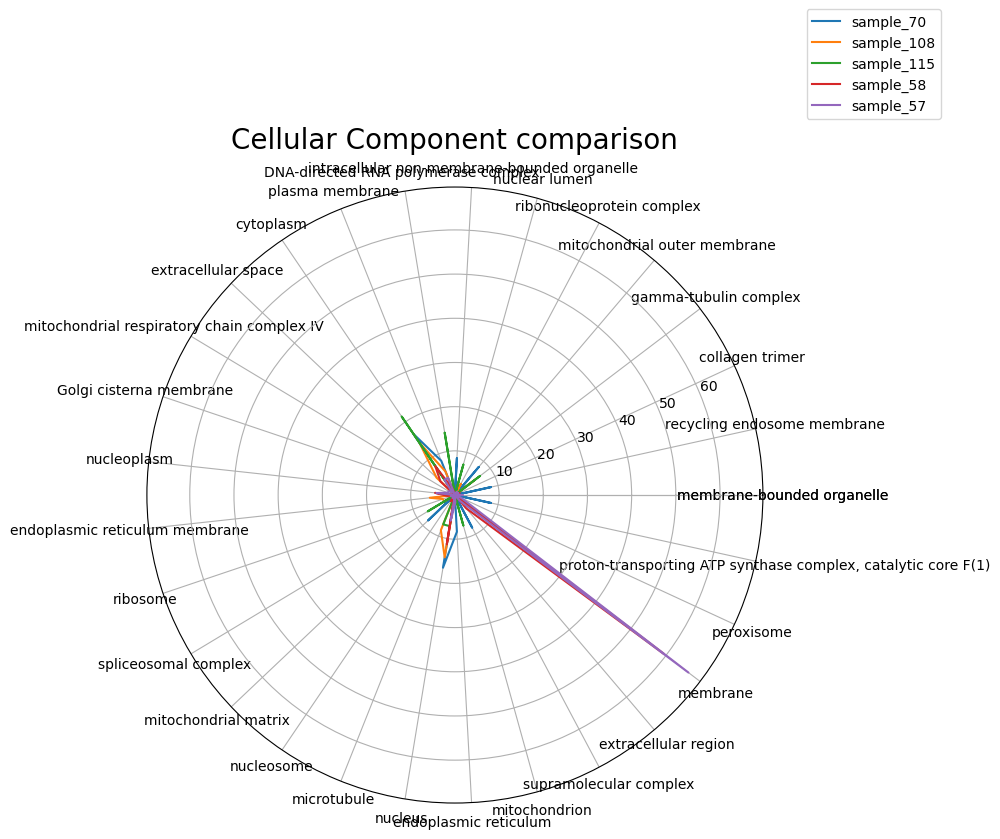

In [114]:
categories = top_20[functions[2]]
categories = [*categories, categories[0]]

data_1 = datasets_ready[db_names[0]][functions[2]]
data_2 = datasets_ready[db_names[1]][functions[2]]
data_3 = datasets_ready[db_names[2]][functions[2]]
data_4 = datasets_ready[db_names[3]][functions[2]]
data_5 = datasets_ready[db_names[4]][functions[2]]
data_1 = [*data_1, data_1[0]]
data_2 = [*data_2, data_2[0]]
data_3 = [*data_3, data_3[0]]
data_4 = [*data_4, data_4[0]]
data_5 = [*data_5, data_5[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(data_1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, data_1, label=db_names[0])
plt.plot(label_loc, data_2, label=db_names[1])
plt.plot(label_loc, data_3, label=db_names[2])
plt.plot(label_loc, data_4, label=db_names[3])
plt.plot(label_loc, data_5, label=db_names[4])
plt.title('Cellular Component comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(bbox_to_anchor=(1.3, 1.3))
plt.show()

In [116]:
import plotly.graph_objects as go
import plotly.offline as pyo


categories = top_20[functions[2]]
categories = [*categories, categories[0]]

data_1 = datasets_ready[db_names[0]][functions[2]]
data_2 = datasets_ready[db_names[1]][functions[2]]
data_3 = datasets_ready[db_names[2]][functions[2]]
data_4 = datasets_ready[db_names[3]][functions[2]]
data_5 = datasets_ready[db_names[4]][functions[2]]
data_1 = [*data_1, data_1[0]]
data_2 = [*data_2, data_2[0]]
data_3 = [*data_3, data_3[0]]
data_4 = [*data_4, data_4[0]]
data_5 = [*data_5, data_5[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=data_1, theta=categories, fill='toself', name=db_names[0]),
        go.Scatterpolar(r=data_2, theta=categories, fill='toself', name=db_names[1]),
        go.Scatterpolar(r=data_3, theta=categories, fill='toself', name=db_names[2]),
        go.Scatterpolar(r=data_4, theta=categories, fill='toself', name=db_names[3]),
        go.Scatterpolar(r=data_5, theta=categories, fill='toself', name=db_names[4])
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Biological Process comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)

)07=                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

'temp-plot.html'

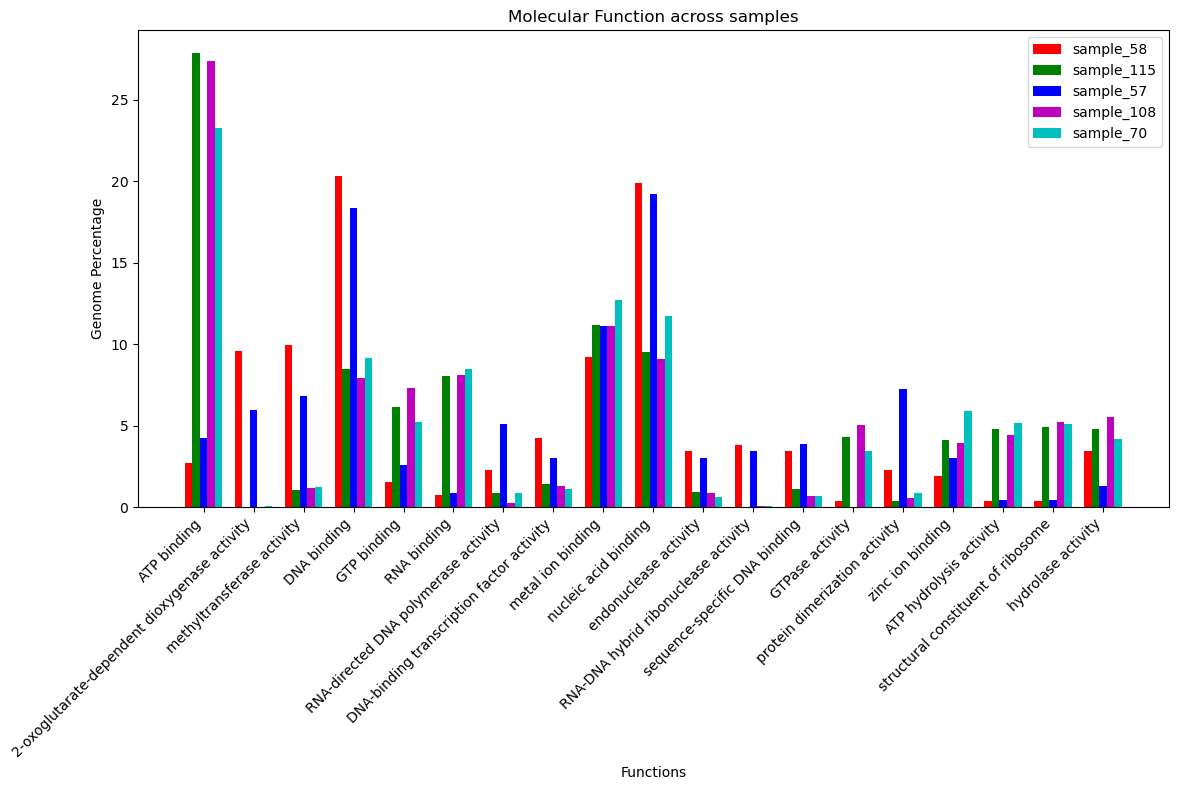

In [104]:
import numpy as np 
import matplotlib.pyplot as plt 
  
N = 19
ind = np.arange(N)  
width = 0.15
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figure size
categories = top_20[functions[1]]
data_1 = datasets_ready[db_names[0]][functions[0]]
data_2 = datasets_ready[db_names[1]][functions[0]]
data_3 = datasets_ready[db_names[2]][functions[0]]
data_4 = datasets_ready[db_names[3]][functions[0]]
data_5 = datasets_ready[db_names[4]][functions[0]]

bar1 = ax.bar(ind, data_1, width, color = 'r') 
  
bar2 = ax.bar(ind+width, data_2, width, color='g') 
  
bar3 = ax.bar(ind+2*width, data_3, width, color = 'b') 

bar4 = ax.bar(ind+3*width, data_4, width, color='m') 
  
bar5 = ax.bar(ind+4*width, data_5, width, color = 'c') 
  
  
plt.xlabel("Functions") 
plt.ylabel('Genome Percentage') 
plt.title("Molecular Function across samples") 
  
plt.xticks(ind+2*width,categories, rotation=45, ha="right") 
plt.legend((bar1, bar2, bar3, bar4, bar5), db_names) 
plt.tight_layout()  # Adjust spacing between bars
plt.show() 